<a href="https://colab.research.google.com/github/vasu-rguktn/Team_X/blob/main/ASHRAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyarrow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import os

In [4]:
os.listdir()

['.config',
 'train.feather',
 'archive.zip',
 'sample_submission.feather',
 'building_metadata.feather',
 'drive',
 'test.feather',
 'weather_test.feather',
 'weather_train.feather',
 'sample_data']

In [5]:
!unzip archive.zip

Archive:  archive.zip
replace building_metadata.feather? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
import os
os.listdir()

['.config',
 'train.feather',
 'archive.zip',
 'sample_submission.feather',
 'building_metadata.feather',
 'drive',
 'test.feather',
 'weather_test.feather',
 'weather_train.feather',
 'sample_data']

In [7]:
import pandas as pd
train=pd.read_feather("train.feather")
building=pd.read_feather("building_metadata.feather")
weather=pd.read_feather("weather_train.feather")


In [8]:
print(train.shape)
print(building.shape)
print(weather.shape)

(20216100, 4)
(1449, 6)
(139773, 9)


In [9]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [10]:
building.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [11]:
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.000000,6.0,20.0,NaN,1019.700012,0.0,0.0
1,0,2016-01-01 01:00:00,24.400000,NaN,21.1,-1.0,1020.200012,70.0,1.5
2,0,2016-01-01 02:00:00,22.799999,2.0,21.1,0.0,1020.200012,0.0,0.0
3,0,2016-01-01 03:00:00,21.100000,2.0,20.6,0.0,1020.099976,0.0,0.0
4,0,2016-01-01 04:00:00,20.000000,2.0,20.0,-1.0,1020.000000,250.0,2.6


In [12]:
data=train.merge(building,on="building_id",how="left")

In [13]:
data=data.merge(weather,on=["site_id","timestamp"],how="left")

In [14]:
data=data[['meter_reading','air_temperature','dew_temperature','wind_speed']]

In [15]:
data.fillna(data.mean(),inplace=True)

In [16]:
print(data.columns)

Index(['meter_reading', 'air_temperature', 'dew_temperature', 'wind_speed'], dtype='object')


In [17]:
data['meter_reading'].describe()

,meter_reading
count,2.021610e+07
mean,2.117122e+03
std,1.532159e+05
min,0.000000e+00
25%,1.830000e+01
50%,7.877500e+01
75%,2.679840e+02
max,2.190470e+07


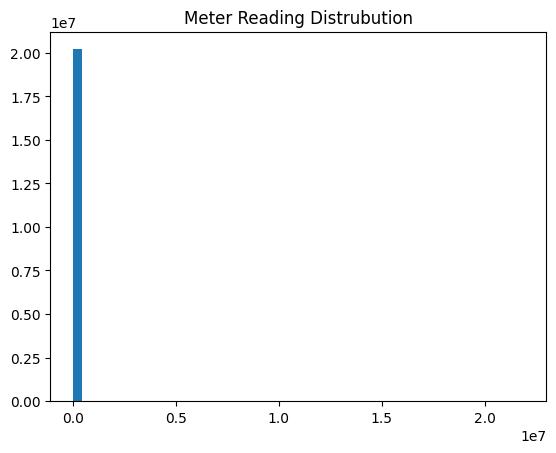

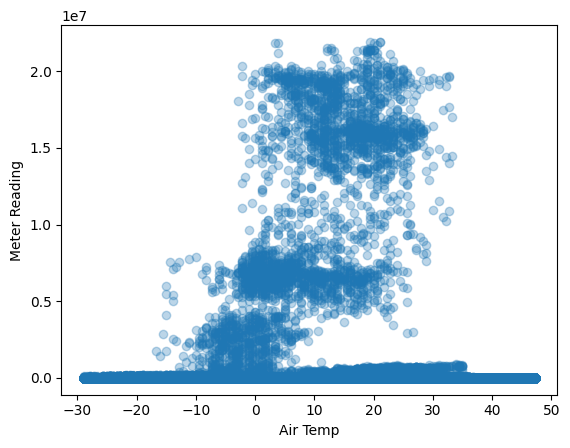

In [18]:
import matplotlib.pyplot as plt
plt.hist(data['meter_reading'],bins=50)
plt.title("Meter Reading Distrubution")
plt.show()
plt.scatter(data['air_temperature'],data['meter_reading'],alpha=0.3)
plt.xlabel("Air Temp")
plt.ylabel("Meter Reading")
plt.show()

In [19]:
data.corr()

,meter_reading,air_temperature,dew_temperature,wind_speed
meter_reading,1.000000,-0.004132,-0.003329,0.006070
air_temperature,-0.004132,1.000000,0.750570,-0.081645
dew_temperature,-0.003329,0.750570,1.000000,-0.141687
wind_speed,0.006070,-0.081645,-0.141687,1.000000


In [21]:
x=data.drop('meter_reading',axis=1)
y=data['meter_reading']

In [20]:
import numpy as np
data['meter_reading_log']=np.log1p(data['meter_reading'])

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(data.drop('meter_reading',axis=1))
y=data['meter_reading']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)



RMSE: 157817.43376446087
R2 Score: 0.004810750484466553
